#Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # classical machine learning models , test split data
from sklearn.linear_model import LinearRegression # which model of machine learning
import seaborn as sns  # seaborn for interactive plots  same as matplot
from sklearn.metrics import mean_squared_error, r2_score # for evaluation of our model

#Loading Dataset

In [ ]:
# load the data set
data = pd.read_csv("/content/drive/MyDrive/Ai Training MetaPi/Week_3/W3_D4/Advertising.csv")

#Looking into the dataset

In [ ]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
data.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [ ]:
data.shape

(200, 5)

# Exploratory Data Analysis

In [ ]:
a=data.describe() # returns dataFrame containing basic stats of dataframe

In [ ]:
type(a)

pandas.core.frame.DataFrame

In [ ]:
a

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [ ]:
b=a.get("TV")

In [ ]:
type(b)

pandas.core.series.Series

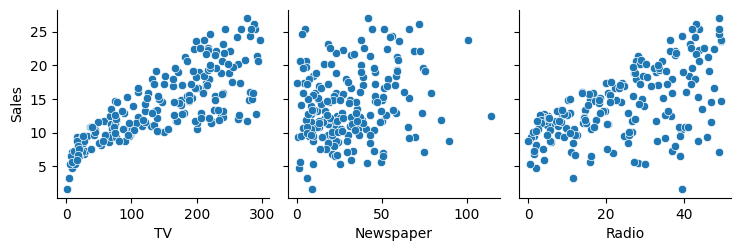

In [ ]:
# Scatter plots of each columns (x) angainst (Y) using seaborn
sns.pairplot(data, x_vars=["TV","Newspaper","Radio"],y_vars="Sales",kind='scatter')
plt.show()

In [ ]:
data.corr

<bound method DataFrame.corr of      Unnamed: 0     TV  Radio  Newspaper  Sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]>

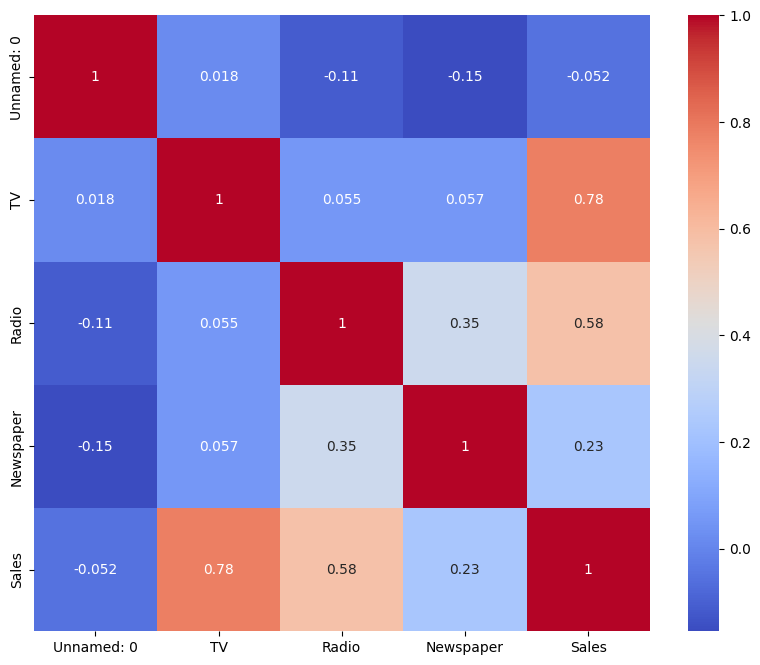

In [ ]:
# Correlation beteen different colomns
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', square=True)
# correlation heatmap matrix
plt.show()

# Dataset prepration for MultiVariate Regression Modeling

In [ ]:
X = data[['Newspaper',"Radio"]].values.reshape(-1,2)
Y = data['Sales']

In [ ]:
X.shape

(200, 2)

In [ ]:
X_train, X_test, y_train, y_test,= train_test_split(X,Y, test_size=0.3,random_state=100)

#Prepar Model for data point for visulizaion

In [ ]:
x=X[:,0]
y=X[:,1]
z=Y

x_pred=pred=np.linspace(data['Newspaper'].min(),   data['Newspaper'].max(),30)          # Range of TV values
y_pred=pred=np.linspace(data['TV'].min(),data['TV'].max(),30)    # Range of radion values
xx_pred,yy_pred=np.meshgrid(x_pred,y_pred)
model_viz=np.array([xx_pred.flatten(),yy_pred.flatten()]).T

#Training

In [ ]:
mod=LinearRegression()
model=mod.fit(X,Y)
predicted=model.predict(model_viz)

#Pridiction

In [ ]:
# Make prediction of the test set
y_pred=model.predict(X_test)

#Evaluation



In [ ]:
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

In [ ]:
print(f'Mean Squared Error = {round(mse, 2)}')
print(f'R^2 = {round(r2, 2)}')

Mean Squared Error = 11.57
R^2 = 0.41


#Plotting

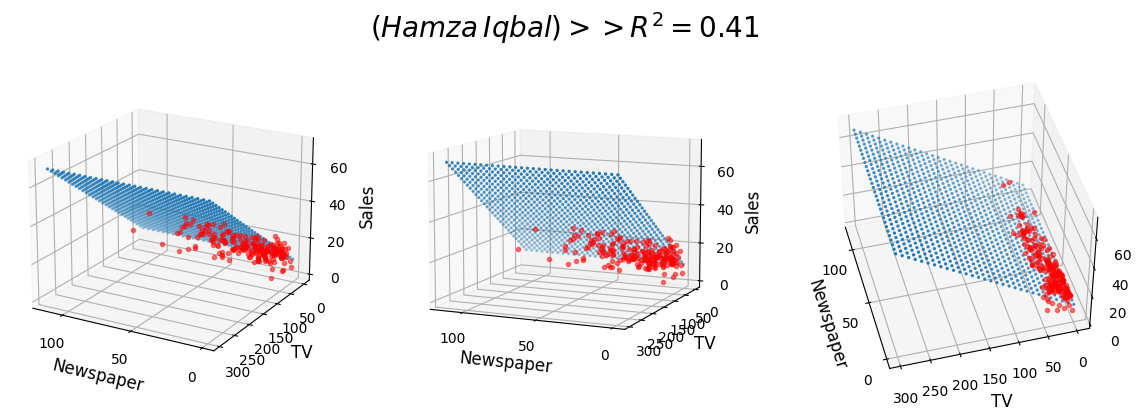

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
plt.style.use("default")

fig=plt.figure(figsize=(12,4))

ax1= fig.add_subplot(131,projection="3d")
ax2= fig.add_subplot(132,projection="3d")
ax3= fig.add_subplot(133,projection="3d")

axes= [ax1,ax2,ax3]

for ax in axes:
  ax.plot(x,y,z, color='r', zorder=15, linestyle='none',marker='.',alpha=0.5)
  ax.scatter(xx_pred.flatten(),yy_pred.flatten(),predicted, s=2)
  ax.set_xlabel("Newspaper",fontsize=12)
  ax.set_ylabel("TV",fontsize=12)
  ax.set_zlabel("Sales",fontsize=12)
  ax.locator_params(nbins=4,axis='x')
  ax.locator_params(nbins=5,axis='x')

ax1.view_init(elev=20,azim=120)
ax2.view_init(elev=10,azim=114)
ax3.view_init(elev=44,azim=165)


fig.suptitle("$(Hamza\u2009 Iqbal) >> R^2 = %.2f$" % r2 , fontsize=20)
fig.tight_layout()

In [ ]:
model.score(X,Y)

0.33270518395032256

____
_____
_____
#Report
_____
_____
_____

- Importing Libraries:
>The code begins by importing necessary libraries such as NumPy, Pandas, Matplotlib, Seaborn, and scikit-learn (sklearn).

- Loading Dataset:
>The code reads an advertising dataset from a CSV file.

- Exploratory Data Analysis (EDA):
>The code performs basic exploratory data analysis, including printing the first few and last few rows of the dataset, getting the shape of the dataset, and calculating descriptive statistics.

- Data Visualization:
>The code creates scatter plots and a correlation heatmap matrix to visualize relationships between different columns of the dataset.

- Dataset Preparation:
>The dataset is split into input features X (Newspaper and Radio columns) and target variable Y (Sales). The dataset is also split into training and testing sets using the train_test_split function.

- Model Preparation and Training:
>The code prepares a linear regression model and trains it using the training data.

- Prediction:
>The model is used to make predictions on the test set.

- Evaluation:
>The code calculates Mean Squared Error (MSE) and R-squared (R^2) values as evaluation metrics for the model's performance on the test set.

- 3D Plotting:
>A 3D plot is created to visualize the relationship between Newspaper, TV, and Sales. Multiple subplots with different viewing angles are generated.

- Conclusion:
>In this analysis, we successfully built a multivariate regression model to predict sales based on advertising budgets in 'Newspaper' and 'Radio'. The model's performance was evaluated using MSE and R², with the results indicating how well the model fits the data. The 3D scatter plots provide a visual representation of the relationships and predictions, aiding in interpretation.

#Insights

This analysis highlights the importance of advertising budgets in different mediums and their impact on sales figures. However, further exploration and refinement of the model could be pursued to enhance its predictive capabilities